1. Импортируйте необходимые библиотеки (TensorFlow/PyTorch,
Matplotlib, NumPy).

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

Загрузите датасет MNIST (из библиотек keras.datasets или
torchvision.datasets). Разделите его на обучающую и тестовую
выборки.

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#Нормализация данных (приведение значений пикселей к диапазону [0, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#Преобразование меток в one-hot encoding (бинарный вектор)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Постройте полносвязную нейронную сеть с использованием
следующих параметров:
• Входной слой, преобразующий изображение 28x28 в вектор длины 784.
• Один или два скрытых слоя (например, с 128 и 64 нейронами).
• Функция активации: ReLU в скрытых слоях и Softmax на выходе.
• Функция потерь: кросс-энтропия.
• Оптимизатор: SGD или Adam.

In [ ]:
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Входной слой, преобразующий изображение 28x28 в вектор длины 784
    layers.Dense(128, activation='relu'),  # Первый скрытый слой с 128 нейронами и функцией активации ReLU
    layers.Dense(64, activation='relu'),   # Второй скрытый слой с 64 нейронами и функцией активации ReLU
    layers.Dense(10, activation='softmax') # Выходной слой с 10 нейронами (по числу классов) и функцией активации Softmax
])

# Компиляция модели
model.compile(optimizer='adam',  #Оптимизатор
              loss='categorical_crossentropy',  #Функция потерь
              metrics=['accuracy'])  #Метрика

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Обучите модель на обучающей выборке.

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=10,  # Количество эпох
                    batch_size=128,  # Размер батча
                    validation_data=(x_test, y_test))  # Тестовые данные для валидации

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8373 - loss: 0.5965 - val_accuracy: 0.9501 - val_loss: 0.1659
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9588 - loss: 0.1438 - val_accuracy: 0.9634 - val_loss: 0.1227
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9712 - loss: 0.0986 - val_accuracy: 0.9698 - val_loss: 0.1023
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9800 - loss: 0.0691 - val_accuracy: 0.9741 - val_loss: 0.0881
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9839 - loss: 0.0551 - val_accuracy: 0.9737 - val_loss: 0.0848
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9872 - loss: 0.0432 - val_accuracy: 0.9716 - val_loss: 0.0873
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9898 - loss: 0.0342 - val_accuracy: 0.9747 - val_loss: 0.0779
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9905 - loss: 0.0298 - val_accuracy: 0.

 Оцените точность на тестовых данных

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Точность на тестовых данных: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9736 - loss: 0.0889
Точность на тестовых данных: 0.9767


Постройте графики:
• Потери (loss) на обучающей и тестовой выборках.
• Точность классификации на обучении и тестировании.

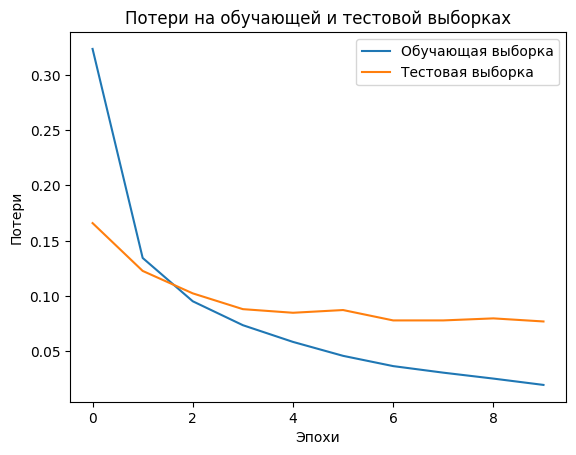

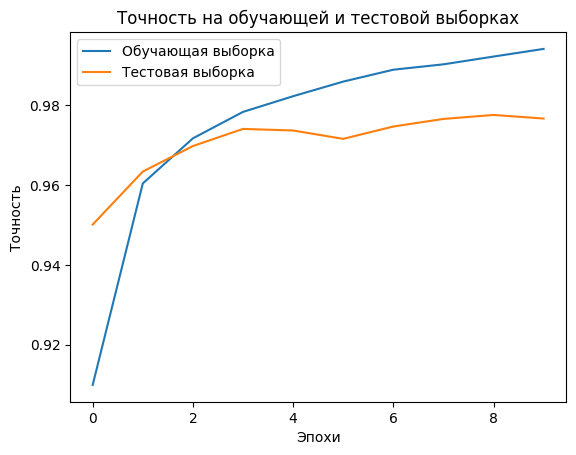

In [ ]:
#График потерь
plt.plot(history.history['loss'], label='Обучающая выборка')
plt.plot(history.history['val_loss'], label='Тестовая выборка')
plt.title('Потери на обучающей и тестовой выборках')
plt.xlabel('Эпохи')
plt.ylabel('Потери')
plt.legend()
plt.show()

#График точности
plt.plot(history.history['accuracy'], label='Обучающая выборка')
plt.plot(history.history['val_accuracy'], label='Тестовая выборка')
plt.title('Точность на обучающей и тестовой выборках')
plt.xlabel('Эпохи')
plt.ylabel('Точность')
plt.legend()
plt.show()

Добавьте визуализацию ошибок классификации (например, изображения неверно классифицированных цифр).

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


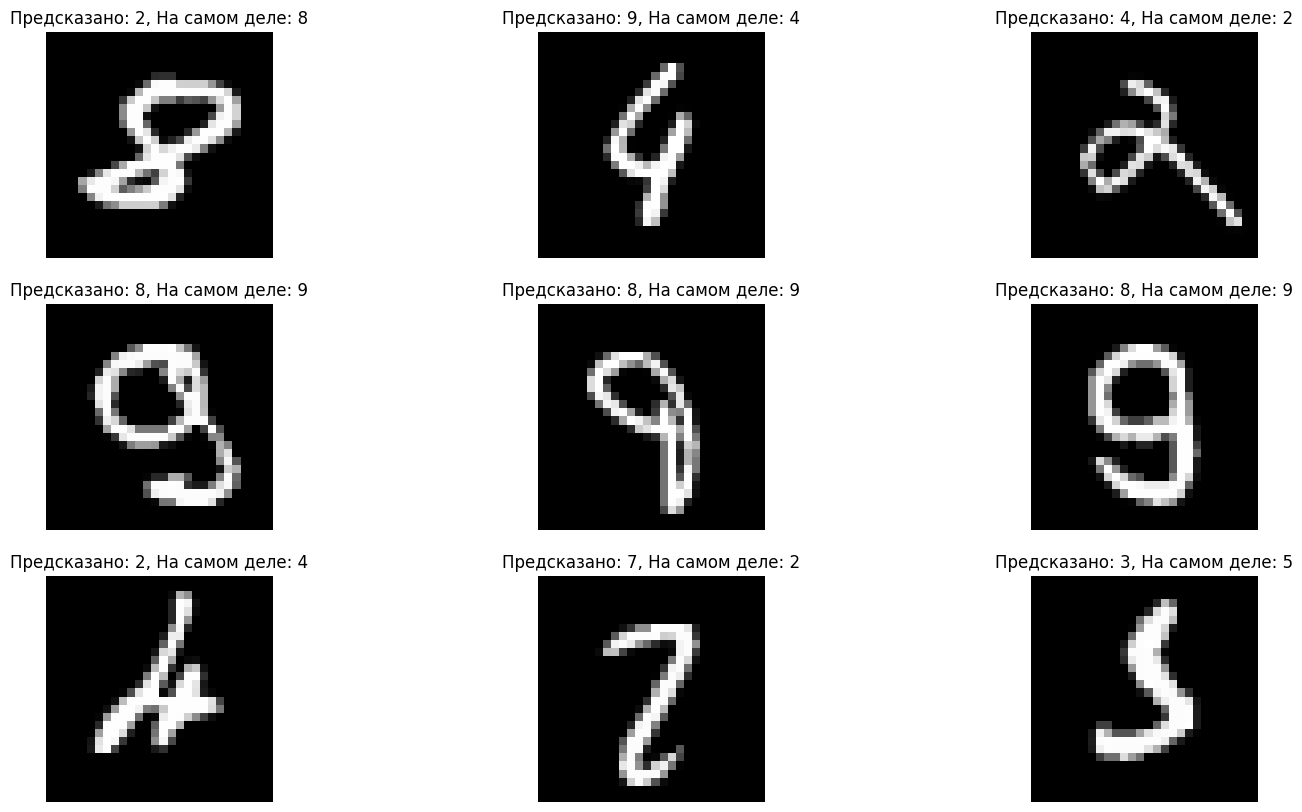

In [ ]:
#Получение предсказаний модели
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

#Нахождение индексов неверно классифицированных изображений
errors = (y_pred_classes != y_true_classes)
x_test_errors = x_test[errors]
y_pred_errors = y_pred_classes[errors]
y_true_errors = y_true_classes[errors]

#Визуализация первых 9 ошибок
plt.figure(figsize=(18, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(x_test_errors[i], cmap='gray')
    plt.title(f'Предсказано: {y_pred_errors[i]}, На самом деле: {y_true_errors[i]}')
    plt.axis('off')
plt.show()

Каждому студенту дается индивидуальный набор данных из Kaggle
или OpenML (например, датасеты по классификации цветов,
текстов или изображений). Я выбрал CIFAR-10

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

#Нормализация данных (приведение значений пикселей к диапазону [0, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#Преобразование меток в one-hot encoding (бинарный вектор)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Постройте полносвязную нейронную сеть для своей задачи
классификации. Требования:
• Минимум 3 слоя (входной, один или два скрытых, выходной).
• Попробуйте разные размеры скрытых слоев (128, 256, 512
нейронов) и функции активации (ReLU, Sigmoid, Tanh).
• Подберите гиперпараметры: количество эпох, размер мини
выборки (batch size), метод оптимизации.

In [ ]:
def build_model(hidden_size=128, activation='relu', use_dropout=False):
    model = models.Sequential([
        layers.Flatten(input_shape=(32, 32, 3)),  #Входной слой
        layers.Dense(hidden_size, activation=activation),  #Скрытый слой 1
        layers.Dense(hidden_size // 2, activation=activation),  #Скрытый слой 2
        layers.Dense(10, activation='softmax')  #Выходной слой
    ])

    if use_dropout:
        model.add(layers.Dropout(0.5))  #Добавляем Dropout для борьбы с переобучением

    model.compile(optimizer='adam',  #Оптимизатор
                  loss='categorical_crossentropy',  #Функция потерь
                  metrics=['accuracy'])  #Метрика
    return model

In [ ]:
# Параметры для экспериментов
hidden_sizes = [128, 256, 512]
activations = ['relu', 'sigmoid', 'tanh']
use_dropout = [False, True]

# Обучение моделей
history_dict = {}
for hidden_size in hidden_sizes:
    for activation in activations:
        for dropout in use_dropout:
            print(f"Training model with hidden_size={hidden_size}, activation={activation}, dropout={dropout}")
            model = build_model(hidden_size, activation, dropout)
            history = model.fit(x_train, y_train,
                               epochs=20,  # Количество эпох
                               batch_size=128,  # Размер батча
                               validation_data=(x_test, y_test),
                               verbose=0)
            history_dict[(hidden_size, activation, dropout)] = history

Training model with hidden_size=128, activation=relu, dropout=False
Training model with hidden_size=128, activation=relu, dropout=True
Training model with hidden_size=128, activation=sigmoid, dropout=False
Training model with hidden_size=128, activation=sigmoid, dropout=True
Training model with hidden_size=128, activation=tanh, dropout=False
Training model with hidden_size=128, activation=tanh, dropout=True
Training model with hidden_size=256, activation=relu, dropout=False
Training model with hidden_size=256, activation=relu, dropout=True
Training model with hidden_size=256, activation=sigmoid, dropout=False
Training model with hidden_size=256, activation=sigmoid, dropout=True
Training model with hidden_size=256, activation=tanh, dropout=False
Training model with hidden_size=256, activation=tanh, dropout=True
Training model with hidden_size=512, activation=relu, dropout=False
Training model with hidden_size=512, activation=relu, dropout=True
Training model with hidden_size=512, activa

Визуализируйте процесс обучения с использованием Matplotlib или
TensorBoard:
• Графики потерь и точности на обучении и тестировании.

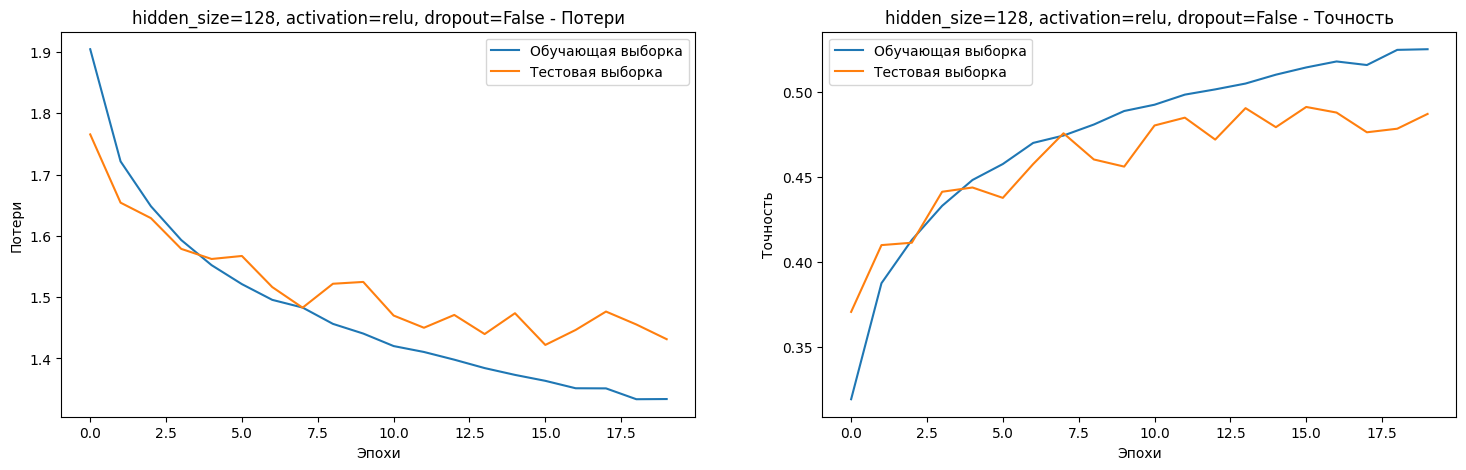

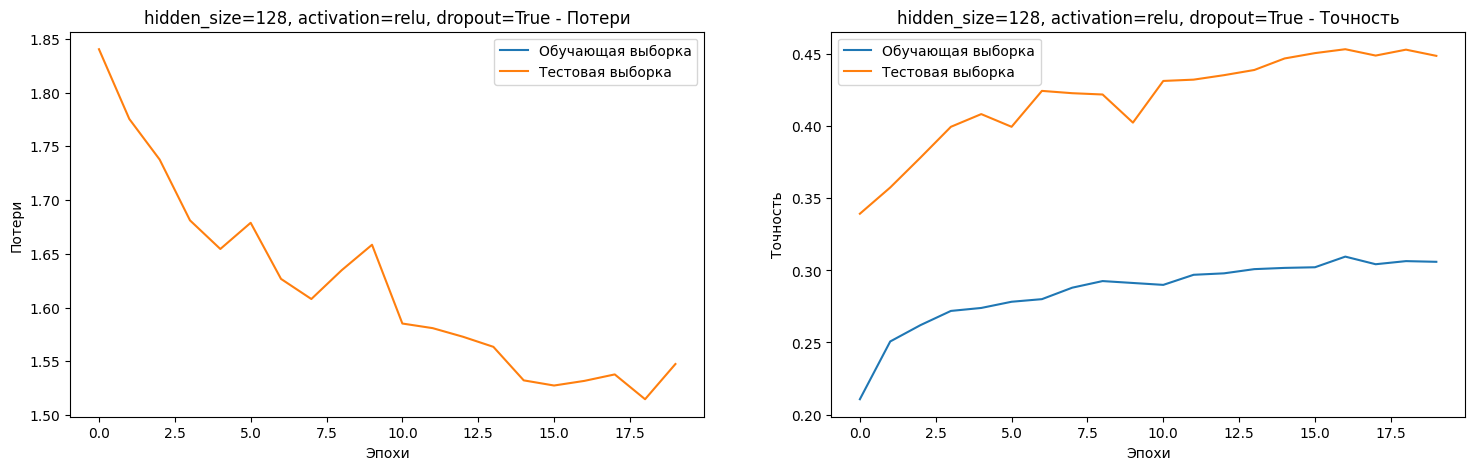

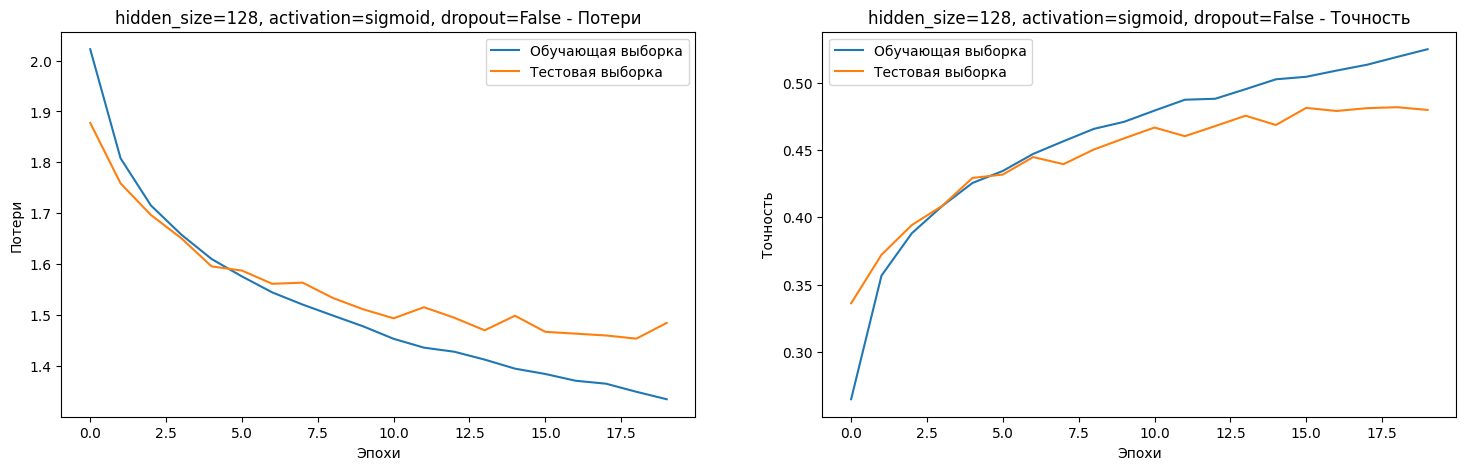

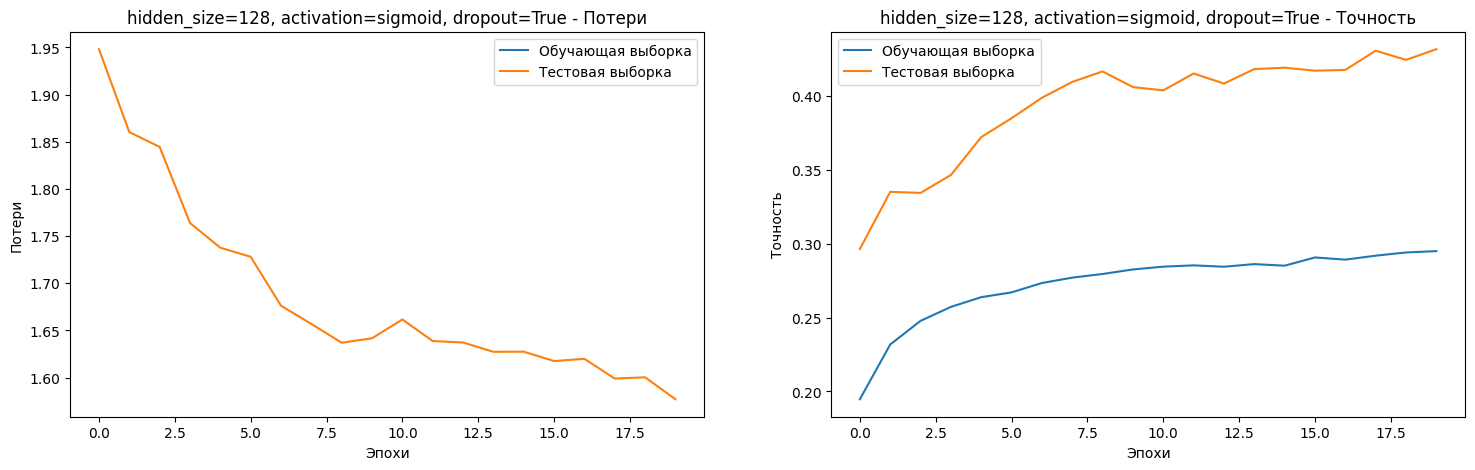

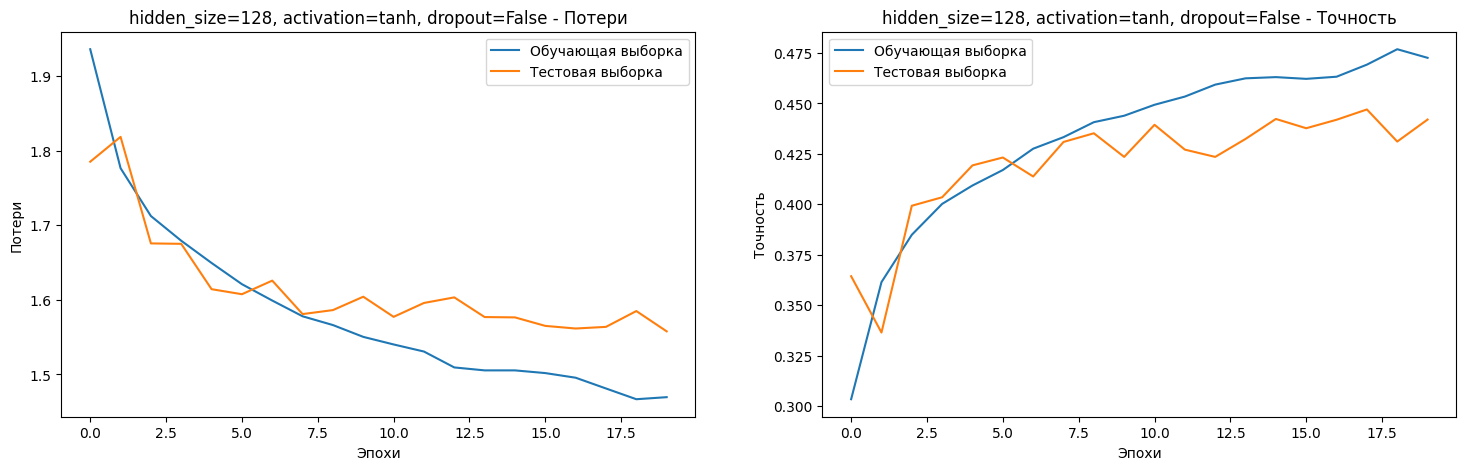

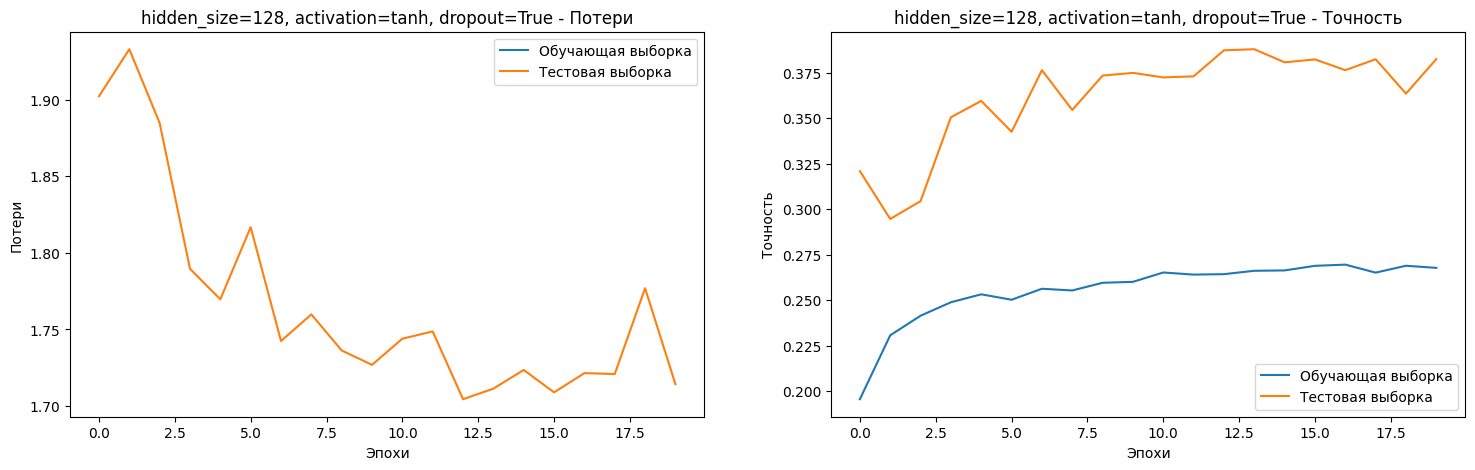

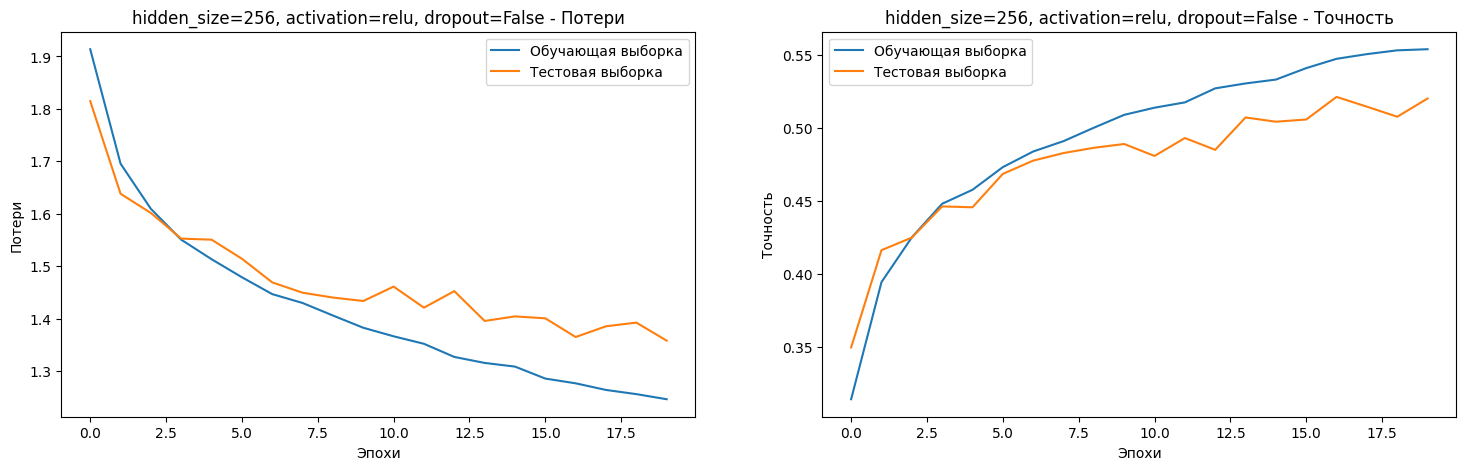

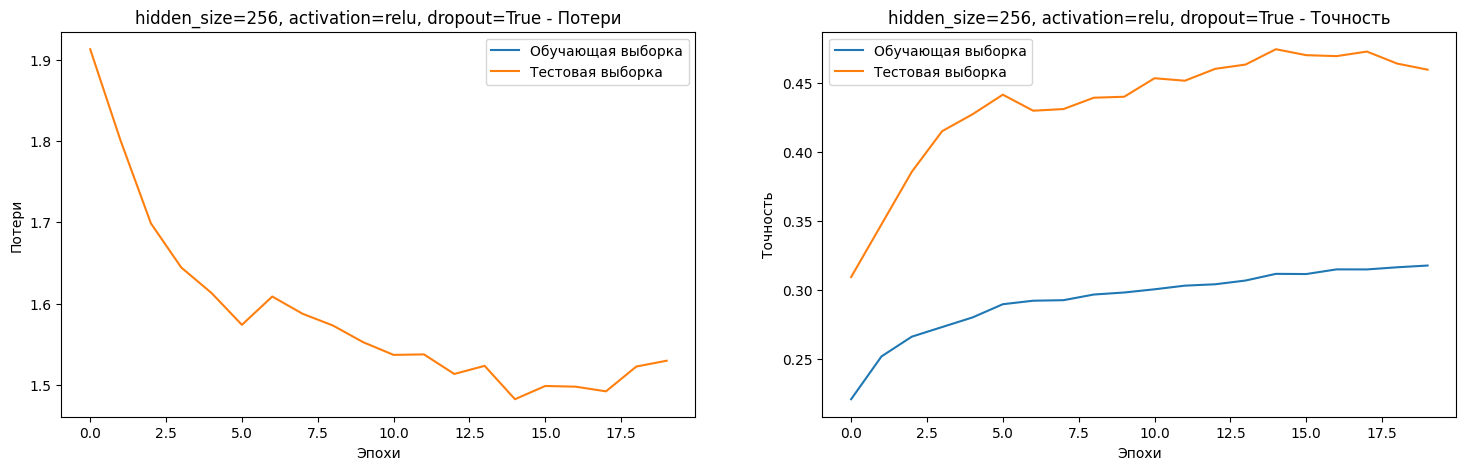

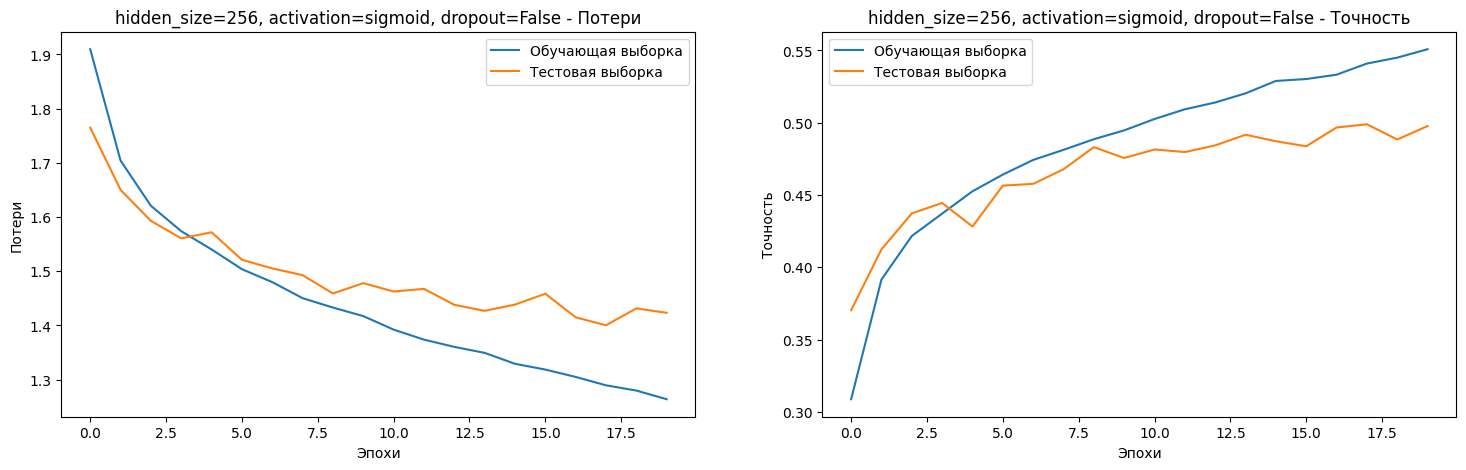

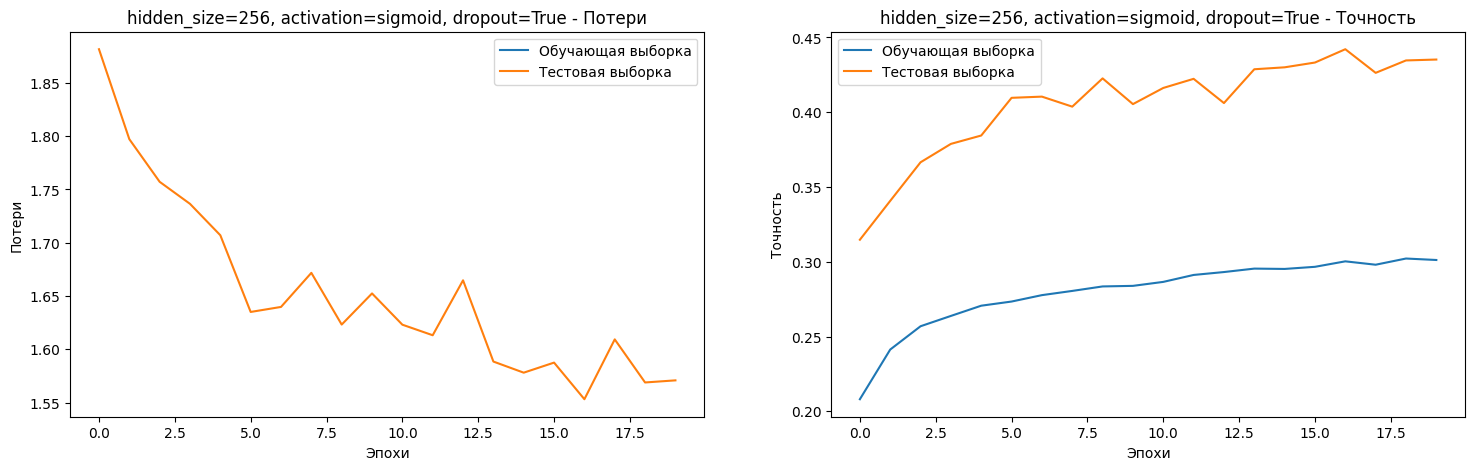

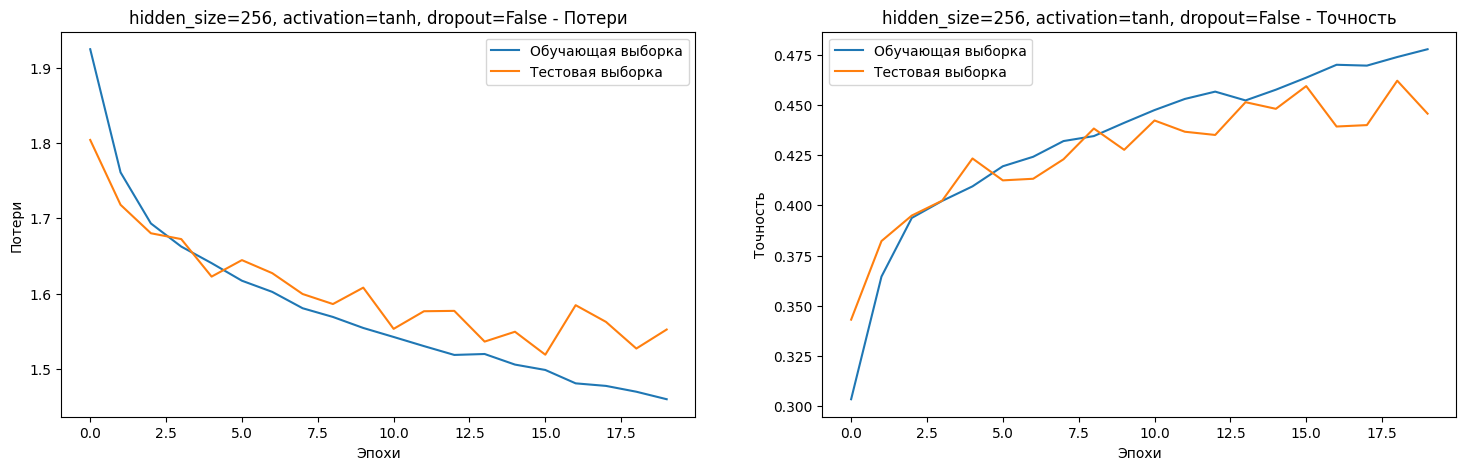

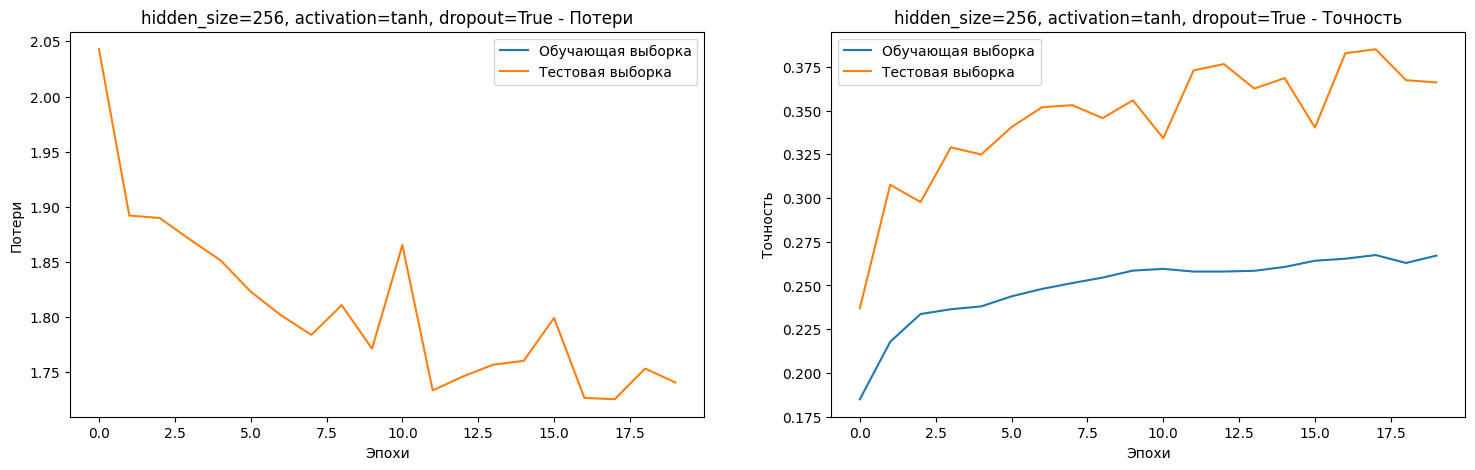

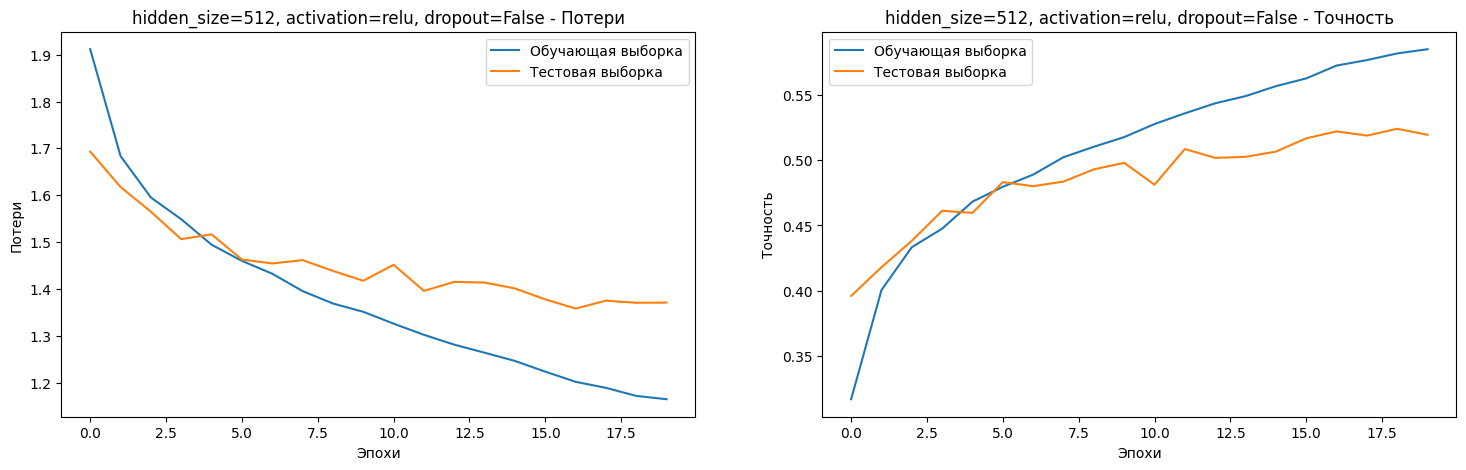

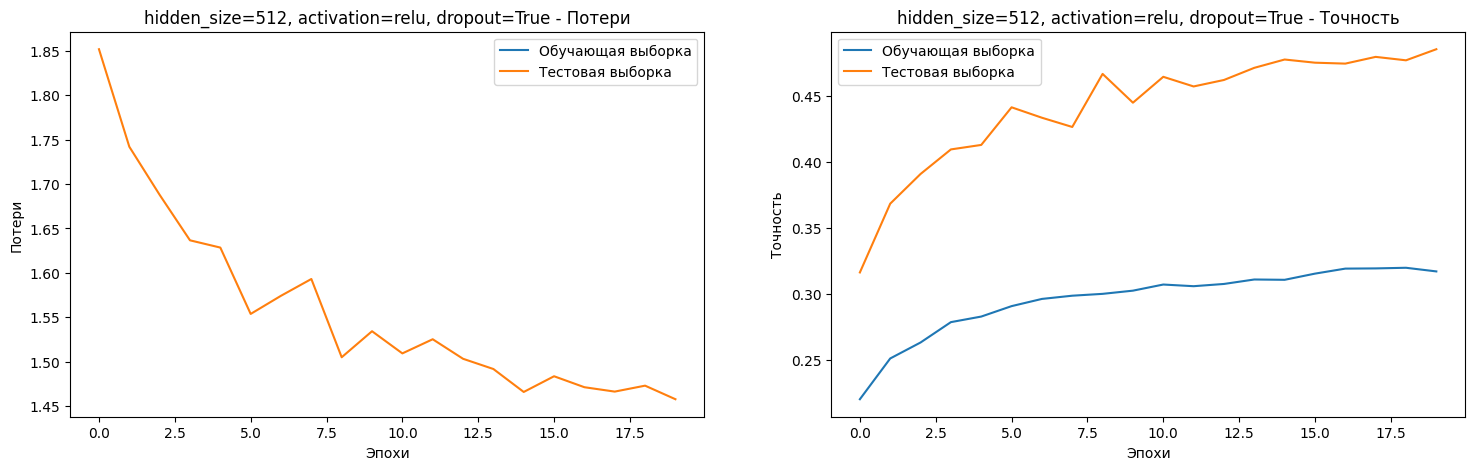

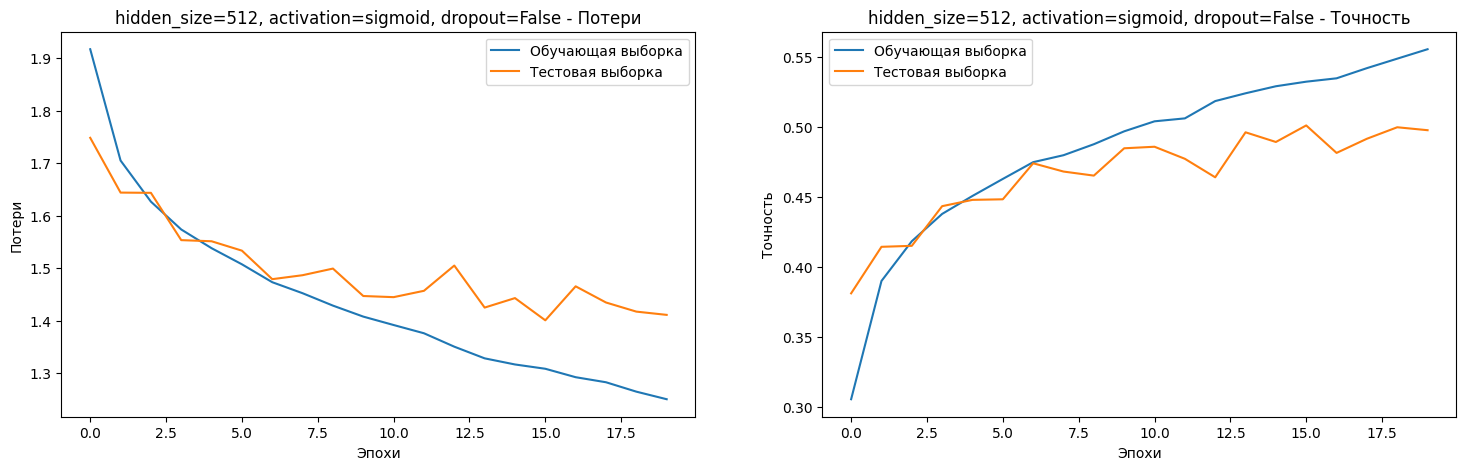

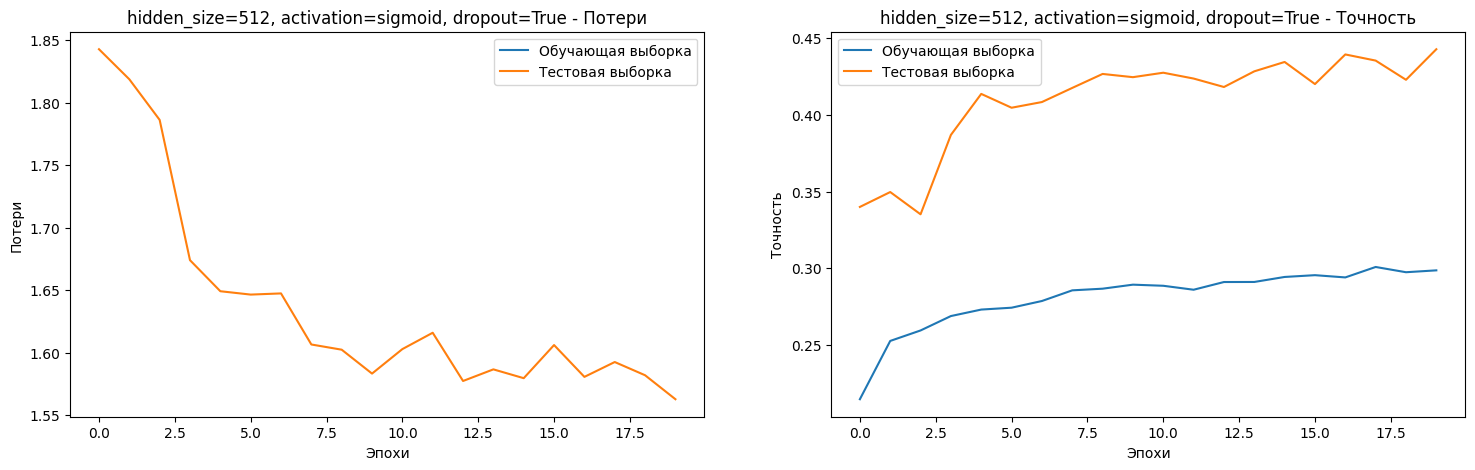

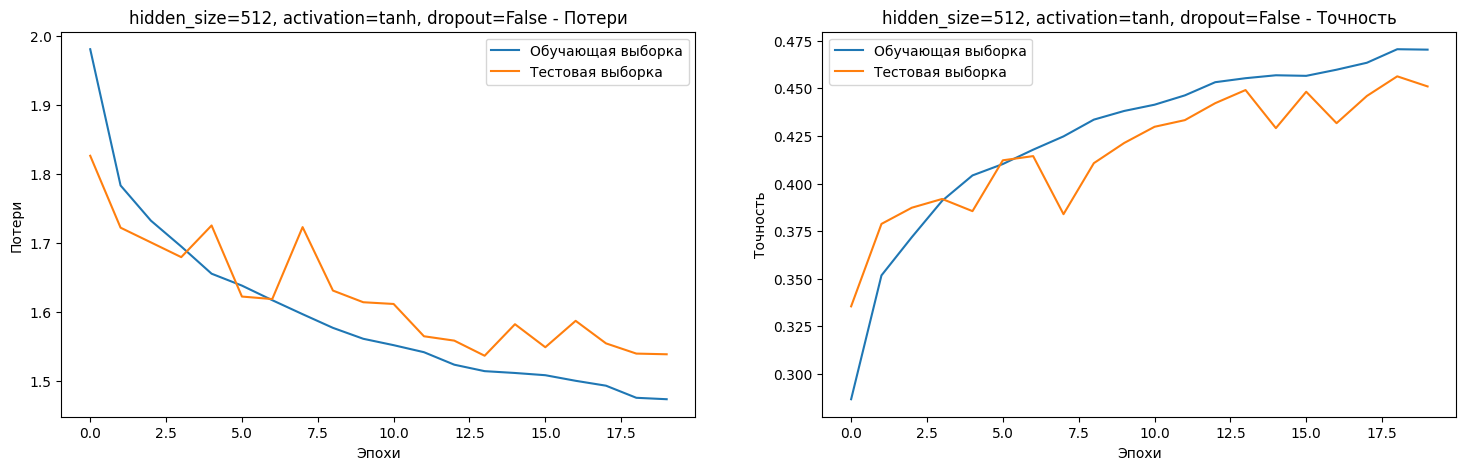

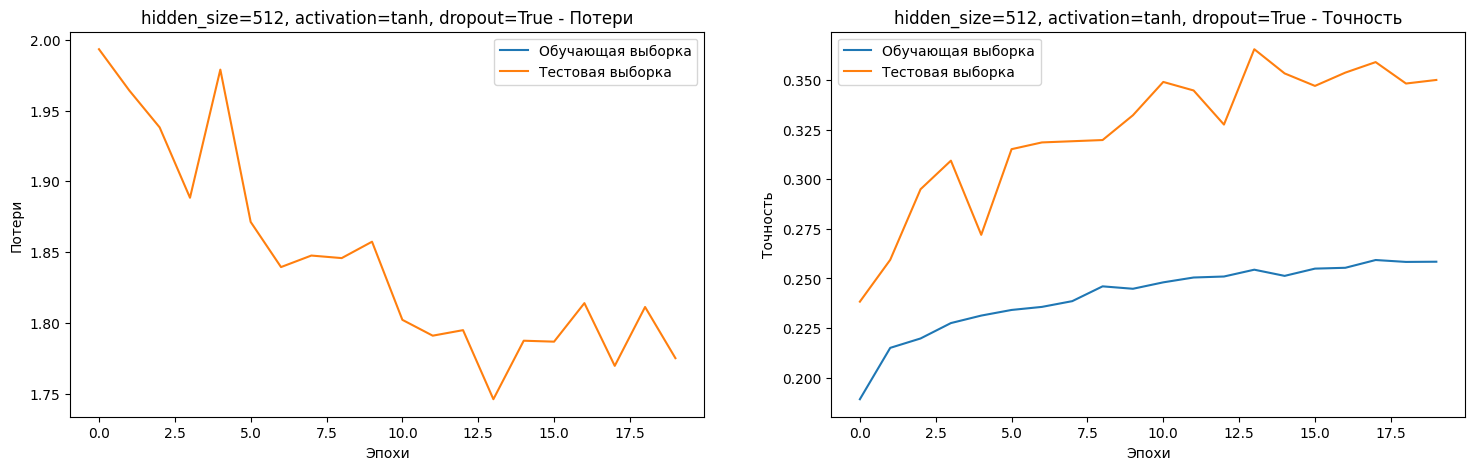

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(18, 5))

    #График потерь
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Обучающая выборка')
    plt.plot(history.history['val_loss'], label='Тестовая выборка')
    plt.title(f'{title} - Потери')
    plt.xlabel('Эпохи')
    plt.ylabel('Потери')
    plt.legend()

    #График точности
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Обучающая выборка')
    plt.plot(history.history['val_accuracy'], label='Тестовая выборка')
    plt.title(f'{title} - Точность')
    plt.xlabel('Эпохи')
    plt.ylabel('Точность')
    plt.legend()
    plt.show()

for key, history in history_dict.items():
    hidden_size, activation, dropout = key
    title = f"hidden_size={hidden_size}, activation={activation}, dropout={dropout}"
    plot_history(history, title)

dropout позволяет рандомно отключать нейроны, чтобы предотвратить переобучение(на обучающей высокие результаты а на тестовой низкие\)


Сравните модели с разными функциями активации.
2.
Выполните защиту результатов, представив:
• Основные метрики качества (точность, F1-мера).
• Влияние гиперпараметров на сходимость.

    hidden_size activation  dropout  accuracy        f1
0           128       relu    False    0.4870  0.481719
1           128       relu     True    0.4488  0.440939
2           128    sigmoid    False    0.4798  0.478782
3           128    sigmoid     True    0.4313  0.424884
4           128       tanh    False    0.4420  0.435581
5           128       tanh     True    0.3825  0.373604
6           256       relu    False    0.5201  0.520174
7           256       relu     True    0.4594  0.448798
8           256    sigmoid    False    0.4977  0.503106
9           256    sigmoid     True    0.4352  0.430009
10          256       tanh    False    0.4456  0.435238
11          256       tanh     True    0.3661  0.351511
12          512       relu    False    0.5195  0.514699
13          512       relu     True    0.4857  0.481267
14          512    sigmoid    False    0.4975  0.494425
15          512    sigmoid     True    0.4427  0.437426
16          512       tanh    False    0.4510  0

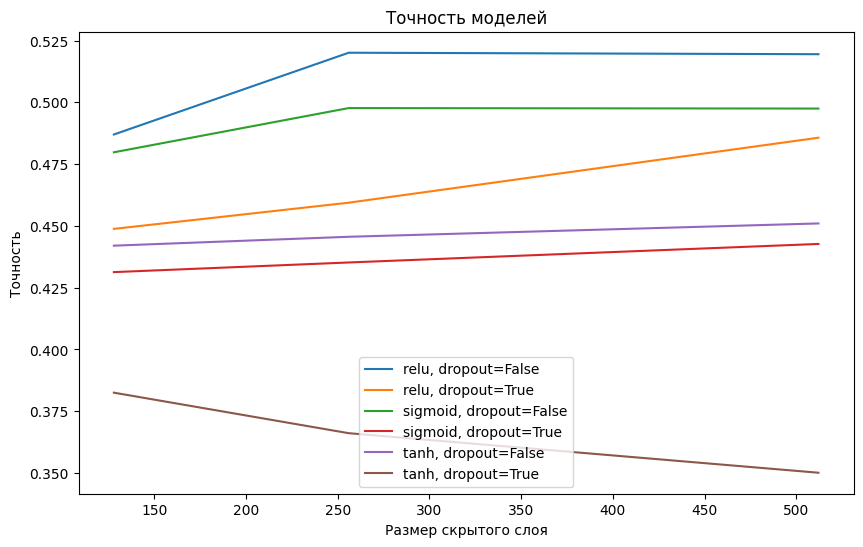

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

#Функция для вычисления метрик
def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)  # Получаем предсказания модели
    y_pred_classes = np.argmax(y_pred, axis=1)  # Преобразуем вероятности в классы
    y_true_classes = np.argmax(y_test, axis=1)  # Преобразуем one-hot в классы (бинарный вектор)

    accuracy = accuracy_score(y_true_classes, y_pred_classes)  # Точность
    f1 = f1_score(y_true_classes, y_pred_classes, average='macro')  # F1-мера (среднее по классам)

    return accuracy, f1

import pandas as pd

#Преобразуем результаты в DataFrame
results_df = pd.DataFrame.from_dict(results, orient='index')
results_df.index = pd.MultiIndex.from_tuples(results_df.index, names=['hidden_size', 'activation', 'dropout'])
results_df.reset_index(inplace=True)
print(results_df)

#Визуализация точности
plt.figure(figsize=(10, 6))
for activation in activations:
    for dropout in use_dropout:
        subset = results_df[(results_df['activation'] == activation) & (results_df['dropout'] == dropout)]
        plt.plot(subset['hidden_size'], subset['accuracy'], label=f"{activation}, dropout={dropout}")
plt.title('Точность моделей')
plt.xlabel('Размер скрытого слоя')
plt.ylabel('Точность')
plt.legend()
plt.show()